## Визуализация данных

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Макрушин С.В. Лекция "Визуализация данных".
* https://numpy.org/doc/stable/reference/generated/numpy.load.html
* https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html
* https://matplotlib.org/stable/gallery/subplots_axes_and_figures/shared_axis_demo.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html
* https://seaborn.pydata.org/examples/index.html
* https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

## Задачи для совместного разбора

1. При помощи пакета `pandas_datareader` загрузите данные о ценах акций Apple с 2017-01-01 по 2018-12-31. Визуализируйте временные ряд цен акций.

In [3]:
!pip install matplotlib

2. Проанализируйте временной ряд максимальной цены акций на предмет выбросов.

## Лабораторная работа 5.1

__Данная работа подразумевает построение рисунков. В связи с этим задания, для которых не будет виден результат выполнения ячеек (получившиеся рисунки), засчитаны не будут вне зависимости от правильности решения.__

### Визуализация данных при помощи пакета `matplotlib`

__В данном блоке задач не разрешается использовать другие пакеты для визуализации, кроме `matplotlib`.__

1\. В файле `average_ratings.npy` содержится информация о среднем рейтинге 3 рецептов за период с 01.01.2019 по 30.12.2021. При помощи пакета `matplotlib` в _одной системе координат_ (на одной картинке) изобразите три временных ряда, соответствующих средним рейтингам этих рецептов. 

По горизонтальной оси располагается номер дня (0, 1, 2, ...), по вертикальной - средний рейтинг рецептов в этот день. 

Названия рецептов и их индексы в файле `average_ratings.npy`:
```
0: waffle iron french toast
1: zwetschgenkuchen bavarian plum cake
2: lime tea
```

Результатом работы является визуализация, на которой:
* добавлена подпись горизонтальной оси с текстом "Номер дня"
* добавлена подпись вертикальной оси с текстом "Средний рейтинг"
* добавлена подпись рисунка с текстом "Изменение среднего рейтинга трех рецептов"
* каждый из временных рядов имеет уникальный цвет
* добавлена легенда, на которой отображается название каждого из рецептов

_Примечание_ : для считывания файла воспользуйтесь функцией `np.load`.

In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

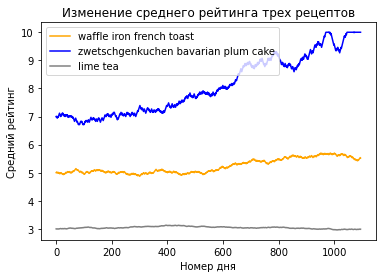

In [5]:
resipies_ratings = np.load('data/average_ratings.npy') # с помощью np.load считываем ndarray из average_ratings.npy
resipie_names = ['waffle iron french toast', 'zwetschgenkuchen bavarian plum cake', 'lime tea']
graph_colores = ['orange', 'blue', 'gray']
# plt.plot(resipies_ratings[0], label=resipie_names[0])

fig, ax = plt.subplots() # сохраянем график для последующего использования

for rate, name, color in zip(resipies_ratings, resipie_names, graph_colores): # добвляем графики в итоговый граф
    plt.plot(rate, label=name, color=color)

# оформляем #
plt.title("Изменение среднего рейтинга трех рецептов")
plt.ylabel("Средний рейтинг")
plt.xlabel("Номер дня")
plt.legend(loc="upper left") # расположение легенды
#############
plt.show()


2\. Измените визуализацию, полученную в задании 1, таким образом, чтобы по горизонтальной оси отображались года, а между двумя соседними годами располагались засечки, соответствующие месяцам. Для этого создайте диапазон дат от 01.01.2019 по 30.12.2021 с шагом в один день (например, [вот так](https://pandas.pydata.org/docs/reference/api/pandas.date_range.html)) и используйте этот диапазон при вызове метода `plot`. Далее настройте `major_locator` и `minor_locator` горизонтальной оси (подробнее см. [здесь](https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html))

Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 1. Измените подпись горизонтальной оси, написав там слово "Дата".


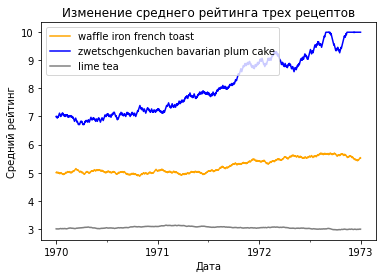

In [6]:
import matplotlib.ticker as ticker
import matplotlib.dates as dates

# dates = pd.date_range(start='01.01.2019', end='30.12.2021', freq="D") # непонятно как использовать
ax.xaxis.set_major_locator(dates.YearLocator()) # прописываем легенду для основных рисок
ax.xaxis.set_minor_locator(dates.MonthLocator(bymonth=(1, 7))) # для минорных, параметром bymonth=(1, 7) задаём раз в полгода
ax.xaxis.set_major_formatter(dates.DateFormatter('%Y')) # преобразование дней в года
ax.set_xlabel('Дата')

fig # выводим получившийся график

3\. Измените визуализацию, полученную в задании 2, разбив одну картинку на три, расположенных друг под другом. Три изображения должны иметь одну общую горизонтальную ось (каждое изображение засечки в нижней части, но значения этих засечек находятся только под самым нижним изображением). Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 2. 

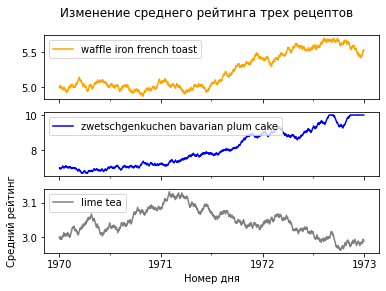

In [7]:
fig, axes = plt.subplots(nrows=len(resipies_ratings), sharex=True)

for i, rate, name, color in zip(range(len(resipies_ratings)), resipies_ratings, resipie_names, graph_colores):
    axes[i].plot(resipies_ratings[i], label=name, color=color)
    # из второго задания #
    axes[i].xaxis.set_major_locator(dates.YearLocator())
    axes[i].xaxis.set_minor_locator(dates.MonthLocator(bymonth=(1, 7)))
    axes[i].xaxis.set_major_formatter(dates.DateFormatter('%Y'))
    ######################
    axes[i].legend(loc="upper left")
    
plt.suptitle("Изменение среднего рейтинга трех рецептов")
plt.ylabel("Средний рейтинг")
plt.xlabel("Номер дня")

plt.show()

4\. В файле `visitors.npy` представлена информация о количестве посетителей сайта в течении первых 100 дней после объявления сайтом акции. Постройте график изменения количества пользователей в зависимости от дня в двух вариантах, расположенных рядом по горизонтале. В обоих случаях изобразите график в виде ломаной, но в первом случае оставьте линейный масштаб осей, а во втором случае сделайте вертикальную ось в логарифмическом масштабе. Добавьте на обе картинки подпись над этим графиком к текстом $y(x)=\lambda e^{-\lambda x}$

Добавьте на оба изображения красную горизонтальную линию на уровне $y=100$. Добавьте на обе картинки подпись над этой линией с текстом $y(x)=100$

Добавьте на оба изображения подписи осей; горизонтальную ось подпишите текстом "Количество дней с момента акции", вертикальную - "Число посетителей".

Добавьте общий заголовок для фигуры с текстом "Изменение количества пользователей в линейном и логарифмическом масштабе".


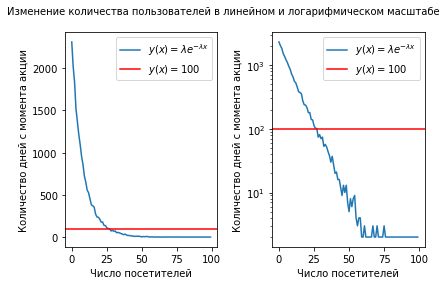

In [8]:
visitors = np.load('data/visitors.npy')

fig, axes = plt.subplots(ncols=2, sharex=True)

axes[0].set_ylabel("Количество дней с момента акции")
axes[0].set_xlabel("Число посетителей")
axes[0].plot(visitors, label=r'$y(x)=\lambda e^{-\lambda x}$')
axes[0].axhline(y=100, color='r', label=r'$y(x)=100$')
axes[0].legend()

axes[1].set_ylabel("Количество дней с момента акции")
axes[1].set_xlabel("Число посетителей")
axes[1].plot(visitors, label=r'$y(x)=\lambda e^{-\lambda x}$')
axes[1].axhline(y=100, color='r', label=r'$y(x)=100$')
axes[1].set_yscale('log')
axes[1].legend()


plt.suptitle("Изменение количества пользователей в линейном и логарифмическом масштабе", fontsize=10)
plt.tight_layout() # чтобы ничего друг друга не перекрывало

plt.show()

## Лабораторная работа 5.2

### Визуализация данных на основе структур `pandas`.

Для продолжения работы загрузите таблицы recipes и reviews (__ЛР2__)

In [9]:
recipes = pd.read_csv('../02_pandas/recipes_sample.csv')
reviews = pd.read_csv('../02_pandas/reviews_sample.csv')

5\. Назовем рецепты короткими, если они занимают строго меньше 5 минут; средними, если они занимают от 5 до 50 минут (не включая 50), и длинными, если они занимают от 50 минут и больше. Сгруппируйте все рецепты по данному признаку и для каждой группы посчитайте 2 величины: среднее количество шагов рецептов в группе и размер группы. При помощи методов структур `pandas` постройте столбчатую диаграмму, где каждый столбец означает группу (короткие, средние или длинные рецепты), а высота столбца обозначает среднее количество шагов рецептов в группе. Рядом по горизонтали разместите круговую диаграмму, на которой отображены размеры каждой из групп.

Добавьте следующие подписи:
* по горизонтальной оси под столбчатой диаграммой напишите "Группа рецептов"
* по вертикальной оси слева от столбчатой диаграммы напишите "Средняя длительность"
* над круговой диаграммой напишите "Размеры групп рецептов"

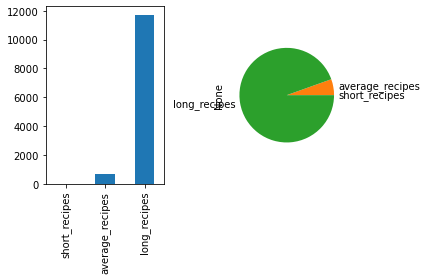

In [68]:
short_recipes = recipes[recipes['minutes'] < 5]
average_recipes = recipes[(5 <= recipes['minutes']) & (recipes['minutes'] < 50)]
long_recipes = recipes[50 <= recipes['minutes']]

short_recipes_size = len(short_recipes)
average_recipes_size =  len(average_recipes)
long_recipes_size =  len(long_recipes)

avg_steps_short_recipes = short_recipes['n_steps'].sum() / short_recipes_size
avg_steps_average_recipes = average_recipes['n_steps'].sum() / average_recipes_size
avg_steps_long_recipes = long_recipes['n_steps'].sum() / long_recipes_size

data = {
    'short_recipes':avg_steps_short_recipes, 
    'average_recipes':short_recipes_size, 
    'long_recipes':long_recipes_size
}
df = pd.Series(data)

fig, axes = plt.subplots(nrows=1, ncols=2)

df.plot(kind="bar", ax=axes[0])
df.plot(kind="pie", ax=axes[1])

plt.tight_layout()
plt.show()

6\. Из всего множества отзывов оставьте только те, которые были даны в 2008 и 2009 годах. Воспользовавшись возможностями метода `pd.DataFrame.plot.hist`, постройте 2 гистограммы столбца `rating`. Гистограммы должны быть расположены рядом по горизонтали. Левая гистограмма соотвествует 2008 году, правая - 2009 году. Добавьте общую подпись для рисунка с текстом "Гистограммы рейтинга отзывов в 2008 и 2009 годах". Добейтесь того, чтобы подпись вертикальной оси правого рисунка не "наезжала" на левый рисунок.

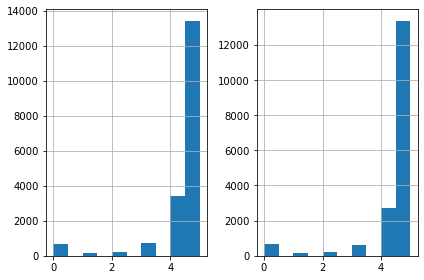

In [27]:
from datetime import datetime

_2008 = str(datetime(2008, 1, 1).date())
_2009 = str(datetime(2009, 1, 1).date())
_2010 = str(datetime(2010, 1, 1).date())

reviews_2008 = reviews[(_2008 <= reviews['date']) & (reviews['date'] < _2009)]
reviews_2009 = reviews[(_2009 <= reviews['date']) & (reviews['date'] < _2010)]

fig, axes = plt.subplots(nrows=1, ncols=2)

reviews_2008['rating'].hist(ax=axes[0])
reviews_2009['rating'].hist(ax=axes[1])

plt.tight_layout()
plt.show()

### Визуализация данных при помощи пакета `seaborn`

7\. При помощи пакета `seaborn` постройте диаграмму рассеяния двух столбцов из таблицы `recipes`: `n_steps` и `n_ingredients`. Укажите в качестве группирующей переменной (hue) категориальную длительность рецепта (короткий, средний или длинные; см. задание 5). 

Добавьте заголовок рисунка "Диаграмма рассеяния n_steps и n_ingredients"

Прокомментируйте, наблюдается ли визуально линейная зависимость между двумя этими переменными. Ответ оставьте в виде текстовой ячейки под изображением.

In [12]:
import seaborn as sns

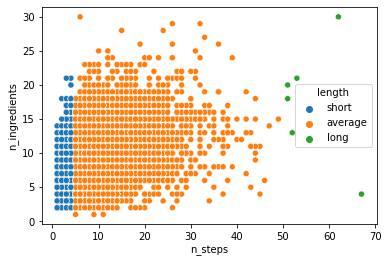

In [47]:
def get_length_tag(x):
    if x > 50:
        return 'long'
    elif 5 <= x < 50:
        return 'average'
    else:
        return 'short'

split_by_length = [get_color(recipes['n_steps'][i]) for i in range(len(recipes))]
 
df = pd.DataFrame({
    'n_ingredients':recipes['n_ingredients'], 
    'n_steps':recipes['n_steps'], 
    'length':split_by_length
})

sns.scatterplot(data=df, x = 'n_steps', y = 'n_ingredients', hue='length')

plt.show()

Линейной зависимости не наблюдается, хотя должна быть

8\. Объедините две таблицы `recipes` и `reviews` и постройте корреляционную матрицу на основе столбцов "minutes", "n_steps", "n_ingredients" и "rating". При помощи пакета `seaborn` визуализируйте полученную матрицу в виде тепловой карты (heatmap). 

Добавьте в ячейки тепловой карты подписи (значения к-та корреляции). Измените цветовую палитру на `YlOrRd`. 

Добавьте заголовок рисунка "Корреляционная матрица числовых столбцов таблиц recipes и reviews"

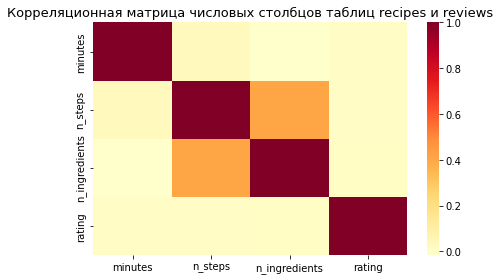

In [67]:
f = pd.concat((recipes, reviews), axis=1)[['minutes', 'n_steps', 'n_ingredients', 'rating']]

sns.heatmap(f.corr(), cmap='YlOrRd')

plt.title("Корреляционная матрица числовых столбцов таблиц recipes и reviews", fontsize=13)

plt.tight_layout()
plt.show()